# 1 環境とエージェント

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [4]:
class Environment:
    
    def __init__(self, size=3, lucky=[]):
        
        self.size = size
        self.lucky = lucky
        self.goal = (size-1, size-1)
        self.states = [(x, y) for x in range(size) for y in range(size)]
        
    def next_state(self, s, a):
        
        s_next = (s[0] + a[0], s[1] + a[1])
        
        if s == self.goal:
            return s
        
        if s_next not in self.states:
            return s
        
        if s_next in self.lucky:
            if np.random.random() < 0.8:
                return self.goal
            else:
                return s_next
        
        return s_next
    
    def reward(self, s, s_next):
        
        if s == self.goal:  # ゴールからどの状態に移動しても報酬ゼロ
            return 0
        
        if s_next == self.goal:
            return 1
        
        return 0            

In [5]:
class Agent():
    
    def __init__(self, environment, policy=[0, 0, 1/2, 1/2]):
        
        self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        self.environment = environment
        
    def action(self, s, a):
        
        s_next = self.environment.next_state(s, a)
        r = self.environment.reward(s, s_next)

        return r, s_next

# 2 エピソードの取得

In [6]:
def get_episode(agent, gamma=0.9):
    print("s, a, s_next, r")
    s = (0,0)
    
    episode = []
    r_sum = 0
    num = 0
    while True:
        a = agent.actions[np.random.randint(0,4)]
        r, s_next = agent.action(s, a)
        episode.append((s, a, s_next, r))
        
        r_sum += (gamma**num)*r
        s = s_next
        num += 1
        
        if s == agent.environment.goal:
            break
            
    return episode, r_sum

# 3 可視化用関数

In [7]:
def show_maze(environment):
    size = environment.size
    fig = plt.figure(figsize=(3,3))

    plt.plot([-0.5, -0.5], [-0.5, size-0.5], color='k')
    plt.plot([-0.5, size-0.5], [size-0.5, size-0.5], color='k')
    plt.plot([size-0.5, -0.5], [-0.5, -0.5], color='k')
    plt.plot([size-0.5, size-0.5], [size-0.5, -0.5], color='k')

    for i in range(size):
        for j in range(size):
            plt.text(i, j, "{}".format(i+size*j), size=20, ha="center", va="center")
            if (i,j) in environment.lucky:
                x = np.array([i-0.5,i-0.5,i+0.5,i+0.5])
                y = np.array([j-0.5,j+0.5,j+0.5,j-0.5])
                plt.fill(x,y, color="lightgreen")

    plt.axis("off")

# 4 シミュレーション

## 4.1 シミュレーション1

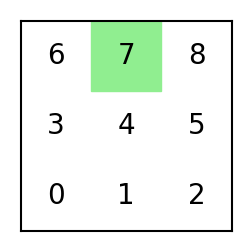

In [12]:
env1 = Environment(lucky=[(1,2)])
agent1 = Agent(env1)
show_maze(env1)

In [15]:
get_episode(agent1)

s, a, s_next, r


([((0, 0), (0, -1), (0, 0), 0),
  ((0, 0), (0, 1), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (0, -1), (0, 0), 0),
  ((0, 0), (0, 1), (0, 1), 0),
  ((0, 1), (0, -1), (0, 0), 0),
  ((0, 0), (1, 0), (1, 0), 0),
  ((1, 0), (0, 1), (1, 1), 0),
  ((1, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (0, -1), (0, 0), 0),
  ((0, 0), (0, 1), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (0, 1), (2, 2), 1)],
 0.18530201888518416)

## 4.2 シミュレーション2

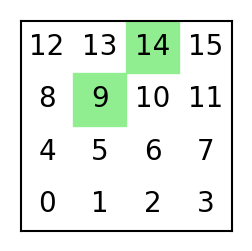

In [16]:
env2 = Environment(size=4, lucky=[(1,2), (2,3)])
agent2 = Agent(env2)
show_maze(env2)

In [23]:
get_episode(agent2)

s, a, s_next, r


([((0, 0), (0, -1), (0, 0), 0),
  ((0, 0), (-1, 0), (0, 0), 0),
  ((0, 0), (0, -1), (0, 0), 0),
  ((0, 0), (-1, 0), (0, 0), 0),
  ((0, 0), (0, -1), (0, 0), 0),
  ((0, 0), (-1, 0), (0, 0), 0),
  ((0, 0), (0, -1), (0, 0), 0),
  ((0, 0), (0, 1), (0, 1), 0),
  ((0, 1), (0, -1), (0, 0), 0),
  ((0, 0), (0, -1), (0, 0), 0),
  ((0, 0), (0, 1), (0, 1), 0),
  ((0, 1), (0, -1), (0, 0), 0),
  ((0, 0), (-1, 0), (0, 0), 0),
  ((0, 0), (1, 0), (1, 0), 0),
  ((1, 0), (0, -1), (1, 0), 0),
  ((1, 0), (0, 1), (1, 1), 0),
  ((1, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (0, -1), (1, 0), 0),
  ((1, 0), (0, 1), (1, 1), 0),
  ((1, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (1, 0), (2, 1), 0),
  ((2, 1), (1, 0), (3, 1), 0),
  ((3, 1), (-1, 0), (2, 1), 0),
  ((2, 1), (0, -1), (2, 0), 0),
  ((2, 0), (0, 1), (2, 1), 0),
  ((2, 1), (0, 1), (2, 2), 0),
  ((2, 2), (0, 1), (3, 3), 1)],
 0.047101286972462485)